In [1]:
# Description : Working Analysis of Stocks Indicator Force Index.

In [2]:
# Import Python Libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [3]:
# Get the Stock Symbol for the Portfolio 
stockSymbols = ['SBIN.NS']

# GET the stock starting date
stockDate = '2019-01-01'

# Get the stock ending date.
stock_End_date = '2020-06-30'

In [4]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockDate, end=stock_End_date):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end, )
  data.columns = ['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume']
  return data

In [5]:
#  Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-01,299.600006,299.600006,300.700012,293.850006,297.500000,11837127.0
2019-01-02,293.899994,293.899994,302.500000,293.100006,299.100006,25559853.0
2019-01-03,291.100006,291.100006,295.549988,290.100006,295.000000,17548347.0
2019-01-04,297.649994,297.649994,299.000000,291.500000,292.100006,19514041.0
2019-01-07,296.299988,296.299988,301.500000,295.200012,301.049988,14579399.0
...,...,...,...,...,...,...
2020-06-25,185.250000,185.250000,186.800003,180.399994,182.199997,73620385.0
2020-06-26,184.600006,184.600006,188.600006,183.800003,188.000000,49176958.0
2020-06-29,179.250000,179.250000,183.100006,178.500000,183.000000,50966428.0


# Force Index:
## The Mathematical formula of Force Index is given as : 
### $$Force Index = ({Close (current period) - Close (prior period)})*{Current period Volume)}$$

In [6]:
# Calculate Force Index.
n = 1

FI = my_stocks['Close'].diff(1) * my_stocks['Volume']
my_stocks['fi'] = FI

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

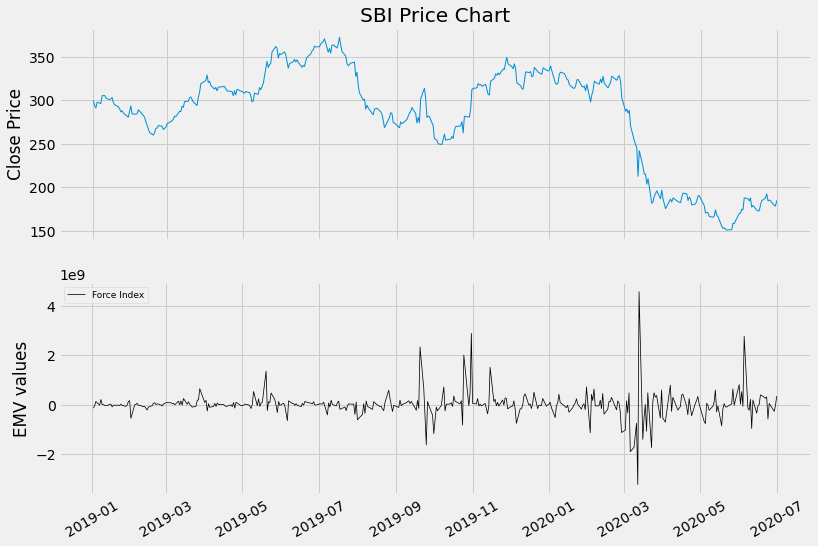

In [10]:
# Plotting the Price Series chart and the Force Index below
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(my_stocks['Close'],lw=1)
plt.title('SBI Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(my_stocks['fi'],'k',lw=0.75,linestyle='-',label='Force Index')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('Force Index')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)